In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [64]:
df = pd.read_csv('fct_invoice.csv')
with open('dim_customer.json', 'r') as file:
    customer = json.load(file)

In [65]:
unique_customers = df['customer_id'].unique()

print(f"Easy 1: {len(unique_customers)} unique customers")

Easy 1: 5191 unique customers


In [66]:
unique_categories = df['category'].unique()
category_list = ", ".join(unique_categories)
num_unique = len(unique_categories)

print(f"Easy 2: {category_list} and {num_unique} unique categories")

Easy 2: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir and 8 unique categories


In [67]:
most_popular_payment = df['payment_method'].value_counts().idxmax()
times_used = df['payment_method'].value_counts().max()

print(f"Easy 3: {most_popular_payment}, used {times_used} times")

Easy 3: Cash, used 44447 times


In [68]:
df['sales'] = df['quantity'] * df['price']
category_sales = df.groupby('category')['sales'].sum()
top_3_categories = category_sales.sort_values(ascending=False).head(3)

print("Medium 1:")
for category, total in top_3_categories.items():
    print(f"- {category}: {total:.2f}")


Medium 1:
- Clothing: 113996791.04
- Shoes: 66553451.47
- Technology: 57862350.00


In [69]:
import pandas as pd
import json

df_invoice = pd.read_csv('fct_invoice.csv')
with open('dim_customer.json', 'r') as file:
    customer_data = json.load(file)
df_customer = pd.DataFrame(customer_data)

merged = df_invoice.merge(df_customer, left_on='customer_id', right_on='id')
merged['total_sales'] = merged['price'] * merged['quantity']
total_sales_over_45 = merged[merged['age'] > 45]['total_sales'].sum()
print("Medium 2:", total_sales_over_45)


Medium 2: 82039768.15


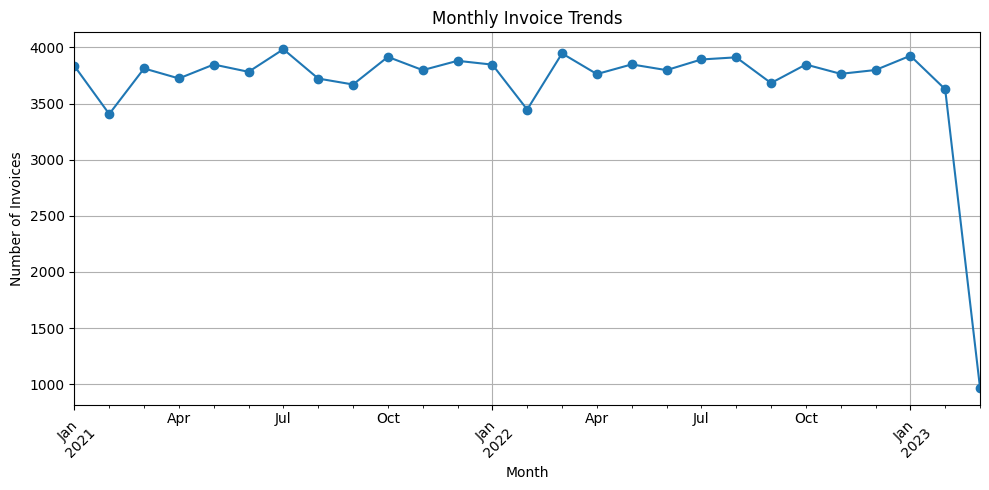

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

df_invoice = pd.read_csv('fct_invoice.csv')
df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'], dayfirst=True)
monthly_invoice_counts = df_invoice['invoice_date'].dt.to_period('M').value_counts().sort_index()

monthly_invoice_counts.plot(kind='line', marker='o', title='Monthly Invoice Trends', figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
merged.dropna(subset=['age'])
merged = merged.dropna(subset=['age']) 

lower = ((merged['age'] // 10) * 10).astype(int)
upper = (lower + 9).astype(int)
merged['age_range'] = lower.astype(str) + '-' + upper.astype(str)
merged['age'] = merged['age'].astype(int)

age_order = sorted(merged['age_range'].unique(), key=lambda x: int(float(x.split('-')[0])))

pivot = pd.pivot_table(
    merged,
    index = 'category',
    columns = 'age_range',
    values = 'total_sales',
    aggfunc = 'sum',
    fill_value=0)

pivot = pivot[age_order]
pivot['Total'] = pivot.sum(axis=1)
pivot.loc['Total'] = pivot.sum()
pivot.style.format("{:,.2f}")

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,Total
category,,,,,,,,,
Books,"12,801.75","79,461.75","84,143.10","87,203.40","74,962.20","80,476.80","54,827.85","26,664.00","500,540.85"
Clothing,"1,927,413.84","10,250,732.80","11,354,126.96","11,215,189.92","10,321,851.76","10,660,642.08","7,769,371.28","4,493,698.00","67,993,026.64"
Cosmetics,"109,619.36","605,915.32","723,544.70","665,034.96","587,780.96","649,990.76","419,082.62","254,531.60","4,015,500.28"
Food & Beverage,"13,582.31","73,491.96","87,246.86","89,553.29","72,425.04","80,976.09","55,050.98","31,332.93","503,659.46"
Shoes,"993,281.35","5,924,878.24","7,200,839.66","7,025,590.02","5,852,857.84","5,978,893.54","4,480,269.05","2,628,744.60","40,085,354.30"
Souvenir,"12,375.15","54,943.32","64,092.72","66,391.80","54,943.32","55,025.43","38,673.81","23,718.06","370,163.61"
Technology,"1,129,800.00","5,261,550.00","6,159,300.00","5,954,550.00","4,435,200.00","5,471,550.00","3,638,250.00","1,946,700.00","33,996,900.00"
Toys,"60,426.24","385,100.80","420,582.40","390,906.88","345,067.52","363,955.20","273,244.16","153,932.80","2,393,216.00"
Total,"4,259,300.00","22,636,074.19","26,093,876.40","25,494,420.27","21,745,088.64","23,341,509.90","16,728,769.75","9,559,321.99","149,858,361.14"
